#Feature Selection Tecniques in Machine Learning

We will describe and put into practice 3 different feature selection techniques 

Feature selection: Selecting the features (variables) which will impact the most the target prediction variable

Feature selection is important because: It will impact the performance and accuracy of our machine learning model, selecting inconsequential variables may impact negatively the performance of our model, the time required to train a model based on a large data set considerably decreases with fewer features. 

Overall it increases accuracy, reduces training time and avoids overfitting meaning the model gets trained on noisy data (random fluctuations of values in the dataset) which impacts the performance of the model

###Techniques we will cover in this notebook


1. Univariate Selection
2. Feature Importance
3. Correlation Matrix with Heatmap

In [156]:
#Just in case we want some warning from warnings.warn to not appear in our results
import warnings
warnings.filterwarnings('ignore')

In [157]:
#Computing and Manipulating data
import pandas as pd 
import numpy as np
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Running Statistical Tests
from sklearn.feature_selection import SelectKBest #Used for univariate selection
from sklearn.feature_selection import chi2 #Used for univariate selection
from sklearn.ensemble import ExtraTreesClassifier #Used for feature importance 

from sklearn.model_selection import train_test_split #Train and split our data
from sklearn.linear_model import LinearRegression #The Linear Regression model

Lets read the data set - This is a rental properties dataset from https://streeteasy.com/ made available by their data science team. Includes rental properties from New York (Manhattan, Queens, Brooklyn). URL = https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv

In [158]:
#read raw data and transform it into a pandas data frame
data = pd.read_csv('https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv')
df = pd.DataFrame(data)
#Print the first 10 rows
df.head(10)  

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan
5,2869,8967298,3600,3.0,2,900,4,1.0,15,1,0,0,0,0,0,0,0,Williamsburg,North Brooklyn,Brooklyn
6,10524,60898078,1950,1.0,1,950,1,3.0,83,0,0,0,0,0,0,0,0,Forest Hills,Central Queens,Queens
7,3946,23468975,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,All Downtown,Manhattan
8,5465,73060494,3500,1.0,1,996,9,7.0,3,1,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
9,10817,64726877,3800,3.0,2,1100,3,5.0,101,0,0,0,0,0,0,0,0,Central Harlem,All Upper Manhattan,Manhattan


Lets select the 14 variables we can work with, we will try and predict the rent price of the property

In [159]:
x = df[['bedrooms','bathrooms','size_sqft','min_to_subway','floor', 'building_age_yrs','no_fee',
        'has_roofdeck','has_washer_dryer','has_doorman','has_elevator','has_dishwasher','has_patio','has_gym']]
y = df[['rent']]

###Technique 1. Univariate Selection

We will examine each independent variable individually to see how closely related they are with our target variable (rent) = Rent Price of the property 

In [160]:
#We will use a chi squared statistical test to select the 10 best features that are closely related to rent price
bestfeatures = SelectKBest(score_func=chi2, k=10) #Applying Select Kbest class to select top 10
fit = bestfeatures.fit(x,y) #Based on our previous selection of the x and y variables

#How it will be modeled
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#Concatenating for visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#Column names
featureScores.columns = ['Features','Score']
#Lets print it out
print(featureScores.nlargest(10,'Score'))

            Features          Score
2          size_sqft  790959.670065
5   building_age_yrs   41282.322373
4              floor   18318.162214
3      min_to_subway    6489.806684
0           bedrooms    1482.446970
12         has_patio     941.293189
6             no_fee     937.844426
8   has_washer_dryer     883.881160
11    has_dishwasher     874.381211
1          bathrooms     823.725194


That gave us the top 10 best features (ranked in order) that have the strongest relation with our target variable

###Technique 2. Feature Selection

This will gives us a score for each future in our data set, again we want to see how important is each independent variable in relation to our target variable. We can easily do this with an inbuilt class from Tree Based Classifiers = Extra Tree Classifier and get the top 10 features.

With this we can get a nice looking graph to visualize it

[0.04740499 0.01918631 0.23965978 0.16427954 0.21028321 0.20079532
 0.01205733 0.01723583 0.01720608 0.01530792 0.0150228  0.01728713
 0.01152183 0.01275193]


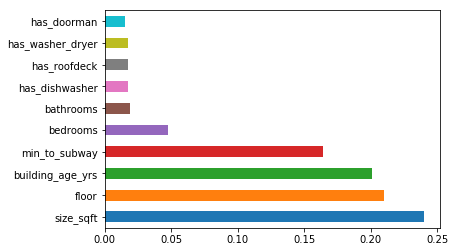

In [161]:
#We will use the Extra Tree Classifier as mentioned above
model = ExtraTreesClassifier()
model.fit(x,y) #based on our previous selection of the x and y variables

#We use inbuilt class feature_importance from Tree Based Classifiers
print(model.feature_importances_)

#Visualization of feature importances
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh') #Again we plot the 10 most relevant variables
plt.show()

Again, this gave us the top 10 best features (ranked in order) that have the strongest relation with our target variable. Note that the variables and the order here are not the same

###Technique 3. Correlation Matrix with Heatmap

This will show us how each different feature is correlated to each other

1 = Strong positive correlation, -1 = Strong negative correlation, 0 = No correlation

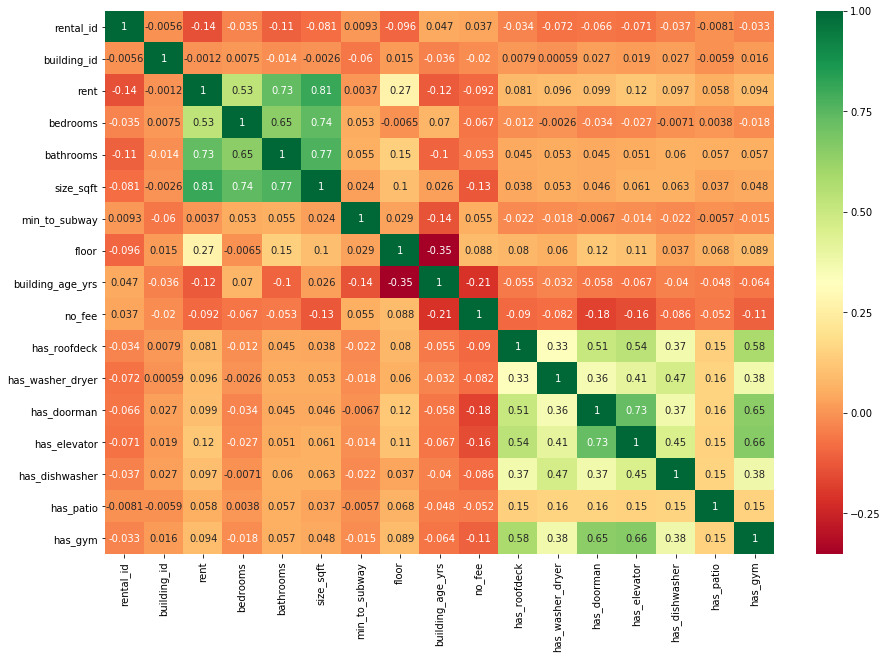

In [162]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
#plot heat map
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We have several binary (1 or 0) variables and they will not show a linear correlation with rent price, even though they could be quite relevant to train and validate our machine learning model.

The main idea here is to that we want to reduce overfitting by selecting A. The variables with the strongest correlation with (rent) our target variable (like bathrooms and size_sqft with 0.77) and B. To avoid selecting variables with a high co-linearity, meaning variables that are closely related to each other (like has_elevator and has_doorman with 0.73) thus reducing the dimensions of our model.

###Great, now using this techniques lets build, train and validate our multiple linear regression model from our previous project, hopefully improving the overall accuracy of the model

Lets use our previous code to compare and contrast results, we will first run the model on the total 14 variables

In [163]:
#Split our data set into 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)

In [164]:
regr = LinearRegression() #Call Linear Regression function

#Now we fit our X train set and our Y train set (80% of our data)
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now we use the model to predict our dependent variable = rent
This is done using x_test which includes 20% of our data

In [165]:
y_predict = regr.predict(x_test)

We want to predict Rent Price based on any given set of independent variables, therefore

###If we get a R²  value of 0.80 that would mean that all the x variables used (the ones we previously selected) together explain 80% of the variation in y = Rent Price

In [166]:
#Lets find the mean squared error regression loss for our training set
print("Train score:")
print(regr.score(x_train, y_train))

Train score:
0.7349688159822418


In [167]:
#Now the mean squared error regression loss for our testing set
print("Test score:")
print(regr.score(x_test, y_test))

Test score:
0.7158565217228287


Good, now lets optimize the model by using the results we obtained in our 3 different feature selection techniques and see if the score actually improves. We will run the model 3 times (one for each technique)

###1. Optimizing using Univariate Selection

In [168]:
#We will select all 10 variables with the highest scores
x2 = df[['bedrooms','bathrooms','size_sqft','min_to_subway','floor', 'building_age_yrs','no_fee',
        'has_washer_dryer','has_dishwasher','has_patio']]
y2 = df[['rent']]

In [169]:
#Split our data set into 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(x2, y2, train_size=0.8, test_size=0.2, random_state=6)
#Call Linear Regression function
regr2 = LinearRegression()
#Now we fit our X train set and our Y train set (80% of our data)
regr2.fit(x_train, y_train)
y_predict2 = regr2.predict(x_test)

In [170]:
#Lets print out the train score
print("Train score:")
print(regr2.score(x_train, y_train))

Train score:
0.7343349580214762


In [171]:
#Lets print out the test score
print("Test score:")
print(regr2.score(x_test, y_test))

Test score:
0.7151569635613346


###Results = This is actually good we reduced the number of features from 14 to 10 and got almost the same score. Even though the score did not improve the dimensions of our training model did.

###2. Optimizing using Feature importance

In [172]:
#Again we select all 10 variables with the highest scores according to the features importance results
x3 = df[['size_sqft','building_age_yrs','floor','min_to_subway','bedrooms','bathrooms',
        'has_washer_dryer','has_roofdeck','has_dishwasher','has_doorman']]
y3 = df[['rent']]

In [173]:
#Split our data set into 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(x3, y3, train_size=0.8, test_size=0.2, random_state=6)
#Call Linear Regression function
regr3 = LinearRegression()
#Now we fit our X train set and our Y train set (80% of our data)
regr3.fit(x_train, y_train)
y_predict3 = regr3.predict(x_test)

In [174]:
#Lets print out the train score
print("Train score:")
print(regr3.score(x_train, y_train))

Train score:
0.7343291710103327


In [175]:
#Lets print out the test score
print("Test score:")
print(regr3.score(x_test, y_test))

Test score:
0.7151622846544412


###Pretty much the same results...what if we reduce the number of features to the 5 most important ones?

In [176]:
#We select the 5 variables with the highest scores according to the features importance results
x4 = df[['size_sqft','building_age_yrs','floor','min_to_subway','bedrooms',
        ]]
y4 = df[['rent']]

In [177]:
#Split our data set into 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(x4, y4, train_size=0.8, test_size=0.2, random_state=6)
#Call Linear Regression function
regr4 = LinearRegression()
#Now we fit our X train set and our Y train set (80% of our data)
regr4.fit(x_train, y_train)
y_predict4 = regr4.predict(x_test)

In [178]:
#Lets print out the train score
print("Train score:")
print(regr4.score(x_train, y_train))

Train score:
0.710442286279837


In [179]:
#Lets print out the test score
print("Test score:")
print(regr4.score(x_test, y_test))

Test score:
0.6724280082954577


###Both our train and test scores went down, what if we try to predict the rent price for the listing we used on the first part of the project? https://streeteasy.com/rental/2177438 

In [180]:
apartment_listing_4 = [[620, 98, 1, 16, 1]]


#Lets predict the rent price
predict4 = regr4.predict(apartment_listing_4)

#And print it out
print('Predicted rent: $%.2f' % predict4)

Predicted rent: $2076.80


##Hmmm the listing was rented for 2,000 dollars and we previously predicted a price of 2,249 dollars for it, yet now with a more inaccurate model we achieved a better prediction in fact we were just about 4% off...This model seems to be a good predictor for this property or in general for lower priced properties?

We did see this in our residual analysis on the first part of the project where we could clearly see the model is highly accurate for lower priced rental properties.

There of course could be other factors like the location of the property (Manhattan, Brooklyn or Queens). We could divide our data sets by Boroughs and check if the model becomes more accurate, but that will be a task for another time.

###Lets run the model one last time using instead of using 5 features lets use 7

In [181]:
#We select the 7 variables with the highest scores according to the features importance results
x5 = df[['size_sqft','building_age_yrs','floor','min_to_subway','bedrooms',
        'bathrooms','has_dishwasher']]
y5 = df[['rent']]

In [182]:
#Split our data set into 80% training and 20% test
x_train, x_test, y_train, y_test = train_test_split(x5, y5, train_size=0.8, test_size=0.2, random_state=6)
#Call Linear Regression function
regr5 = LinearRegression()
#Now we fit our X train set and our Y train set (80% of our data)
regr5.fit(x_train, y_train)
y_predict5 = regr5.predict(x_test)

In [183]:
#Lets print out the train score
print("Train score:")
print(regr5.score(x_train, y_train))

Train score:
0.7333420722653226


In [184]:
#Lets print out the test score
print("Test score:")
print(regr5.score(x_test, y_test))

Test score:
0.7150470990599502


###Results: Great, even though we got the same results in our train and test scores, we were able to further reduce the number of features used in our model, from a total of 14 we are now using 7 and getting the same level of accuracy.

There are a number of reasons to why the model seems to be peaking between 71% and 73% accuracy without getting better, Data Science is all about exploration and optimization, there are numerous ways to futher increase the accuracy of a model and we will work on those on future projects, for now we have fulfilled the purpose of this one. 

We will not try and optimize the results based on the Correlation Matrix Heatmap as we can expect the results to have a similar accuracy.